# O'Connor 2013 Models

Data from O'Connor & Ott 2013, 32 progenitors (Woosley and Heger 2007) and 2 EOS (LS220 and HShen) for 500 ms post bounce in spherical symmetry (no explosions)
  
Reference: O'Connor and Ott ApJ 762 126 2013
- doi:10.1088/0004-637X/762/2/126
- arXiv:1207.1100

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models import OConnor_2013
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

In [2]:
mpl.rc('font', size=16)

## LS220 EOS: all 32 masses

In [39]:
base = './'
EOS="LS220"
models = {}
masses = [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,40,45,50,55,60,70,80,100,120]
for mass in masses:
    models[mass] = OConnor_2013(base,mass,EOS)

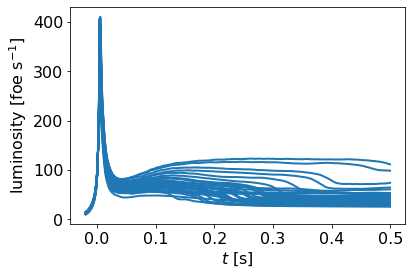

In [42]:
plt.clf()
for mass in masses:
    plt.plot(models[mass].time,models[mass].luminosity[Flavor.NU_E]/1e51,'C0',lw = 2 )
    
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'luminosity [foe s$^{-1}$]')
plt.show()

In [43]:
base = './'
EOS="HShen"
mass=15
model = OConnor_2013(base,mass,EOS)

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [44]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 400*u.ms

ispec = model.get_initial_spectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

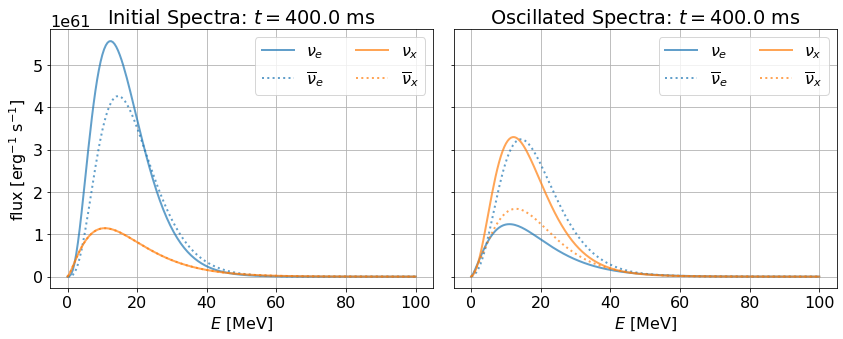

In [45]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();